# ÖDEV4
# Öğrenci No: 171024011
# Öğrenci Adı ve Soyadı: Yağmur Derya

In [1]:
# gerekli tanımlamalar yapıldı
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

cos = np.cos
sin = np.sin
pi = np.pi

## SORU-1

$x_1(t)=7cos(200\pi t)
\\x_2(t)=3cos(200\pi t)+4cos(1800\pi t)
$

$F_1 = 100 Hz
\\F_2 = ebob(100, 600) = 100 Hz
$ İki işaret de Nyquist ($2F \le F_s$) şartını sağladığı için örtüşme olmamalı.

<IPython.core.display.Javascript object>


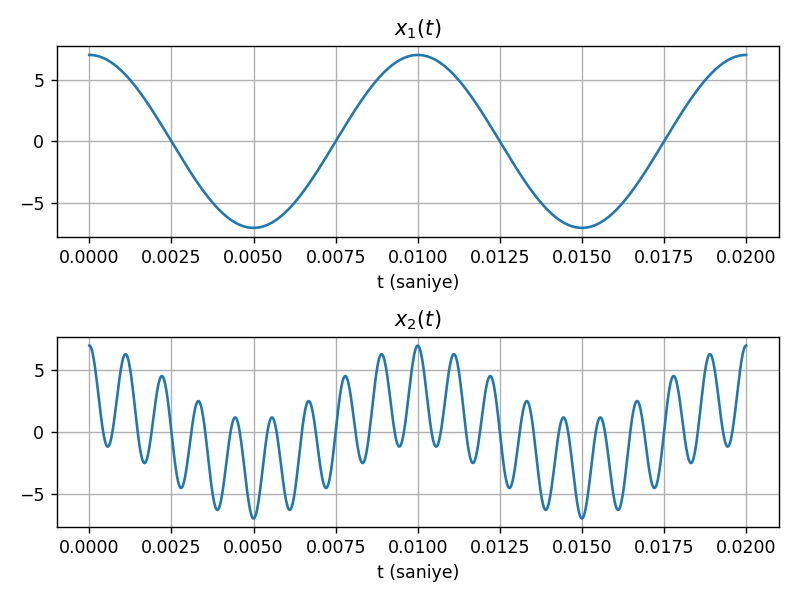

In [2]:
# işaretlerin örneklenmeden önceki hallerini de inceleyebilmek için çizdirdim.

T = 1/100                      # temel periyot
t = np.linspace(0, 2*T, 1000)  # sürekli zaman aralığı ayarlandı
            
x_1_c = 7*cos(200*pi*t)                      # x_1(t)
x_2_c = 3*cos(200*pi*t) + 4.*cos(1800*pi*t)  # x_2(t)

plt.figure() # yeni figür

plt.subplot(2, 1, 1), plt.plot(t, x_1_c), plt.title('$x_1(t)$'), plt.xlabel('t (saniye)'), plt.grid() # x_1_c(t) işareti çizdirildi
plt.subplot(2, 1, 2), plt.plot(t, x_2_c), plt.title('$x_2(t)$'), plt.xlabel('t (saniye)'), plt.grid() # x_2_c(t) işareti çizdirildi

plt.tight_layout() # başlıkların çakışması engellendi
plt.show()         # grafikler gösterildi

### a)

$x_1[n]=7cos(200\pi\frac{n}{2200})=7cos(\frac{\pi}{11}n) => \omega = \frac{\pi}{11} = \frac{2\pi k}{N_1} \rightarrow N_1=22$

$x_2[n]=3cos(200\pi\frac{n}{2200})+4cos(1800\pi\frac{n}{2200}) = 3cos(\frac{\pi}{11}n) + 4 cos(\frac{9\pi}{11}n)
\\ 3cos(\frac{\pi}{11})=> \omega = \frac{\pi}{11} = \frac{2\pi k}{N} \rightarrow N=22
\\ 4 cos(\frac{9\pi}{11}n) => \omega = \frac{9\pi}{11} = \frac{2\pi k}{N} \rightarrow k= 9, N = 22
\\ N_2= 22
$

<IPython.core.display.Javascript object>


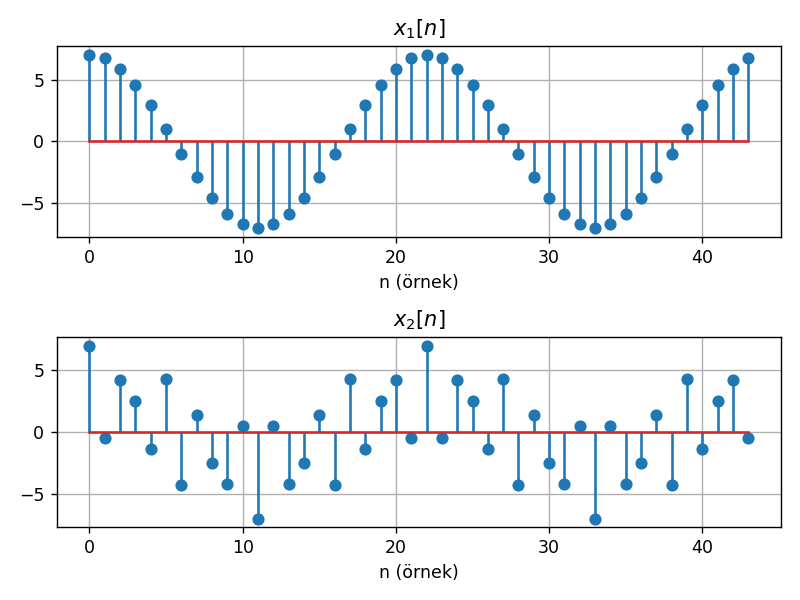

In [3]:
Fs = 2200             # örnekleme frekansı
Ts = 1/Fs             # örnekleme periyodu
N = 22                # örnekleme indisi
n = np.arange(0, 2*N) # iki periyod olacak şekilde örnekleme aralığı


x_1 = 7*cos(200*pi*n*Ts)                       # x_1[n]
x_2 = 3*cos(200*pi*n*Ts) + 4*cos(1800*pi*n*Ts) # x_2[n]

plt.figure() # yeni figür

plt.subplot(2, 1, 1), plt.stem(n, x_1), plt.title('$x_1[n]$'), plt.xlabel('n (örnek)'), plt.grid() # x_1[n] işareti çizdirildi
plt.subplot(2, 1, 2), plt.stem(n, x_2), plt.title('$x_2[n]$'), plt.xlabel('n (örnek)'), plt.grid() # x_2[n] işareti çizdirildi

plt.tight_layout()
plt.show()

İki işaret aynı değildir. Her iki işaretin toplam temel frekansı eşit olmasına rağmen, ikinci işaretin kendi içinde temel frekansı 900 Hz olan $4cos(1800\pi t)$ işareti bulunmaktadır. Bu sebeple işarette dalgalanmalar vardır, birinci işaret gibi pürüzsüz değildir ve örnekleme frekansı sebebiyle bu dalgalanmalar örneklendikten sonra da gözükmekte. Eğer örnekleme frekansını değiştirirsek, iki işaret aynı gözükebilir. 

### b)

<IPython.core.display.Javascript object>


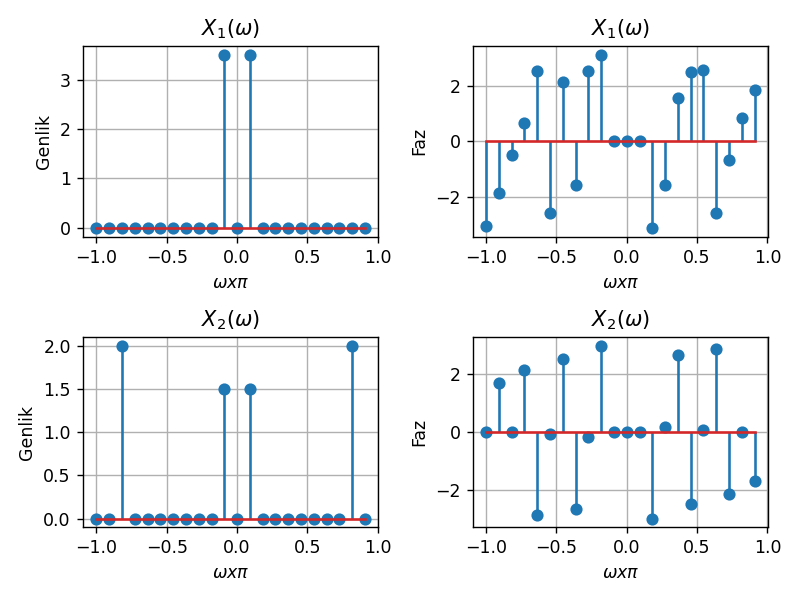

In [4]:
w = np.arange(-np.pi, np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında 2pi/N aralıklarla tanımlandı

x_1_w = np.fft.fftshift(np.fft.fft(x_1, N)/N)   # x_1[n]'in FT alındı

x_2_w = np.fft.fftshift(np.fft.fft(x_2, N)/N)   # x_2[n]'in FT alındı

plt.figure() # yeni figür

plt.subplot(2, 2, 1), plt.stem(w/pi, abs(x_1_w)), plt.grid()                   # x_1(w) işaretinin genlik grafiği çizdirildi
plt.title("$X_1(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Genlik')  # başlık ve eksen isimlendirmesi yapıldı


plt.subplot(2, 2, 2), plt.stem(w/pi, np.angle(x_1_w)), plt.grid()              # x_1(w) işaretinin faz grafiği çizdirildi
plt.title("$X_1(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Faz')     # başlık ve eksen isimlendirmesi yapıldı

plt.subplot(2, 2, 3), plt.stem(w/pi, abs(x_2_w)), plt.grid()                   # x_2(w) işaretinin genlik grafiği çizdirildi
plt.title("$X_2(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Genlik')  # başlık ve eksen isimlendirmesi yapıldı

plt.subplot(2, 2, 4), plt.stem(w/pi, np.angle(x_2_w)), plt.grid()              # x_2(w) işaretinin faz grafiği çizdirildi
plt.title("$X_2(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Faz')     # başlık ve eksen isimlendirmesi yapıldı

plt.tight_layout() 
plt.show()

İşaretler örnekleme frekansının yeterince büyük olmasından kaynaklı örneklendiklerinde de farklı oldukları için, elde edilen grafiklerde de farklı çıkmışlardır. Örtüşme/bozulma yoktur.

### c)

$X_1(\omega)=3.5e^{j0}\delta(\omega-0.09\pi) + 3.5e^{j0}\delta(\omega+0.09\pi)=3.5\delta(\omega-0.09\pi)+3.5\delta(\omega+0.09\pi) \leftrightarrow x_1[n]=2x3.5cos(0.09\pi n)
\\ 0.09 \approx \frac{1}{11}
\\ x_1[n]=7cos(\frac{\pi}{11} n)
$ grafiklerden aynı işaret elde edildi. Zaten örtüşme olmadığı için sinyalin geri elde edilmesi bekleniyordu.

$X_2(\omega) = 1.5e^{j0}[\delta(\omega-0.09\pi)+\delta(\omega+0.09\pi)]+2e^{j0}[\delta(\omega-0.82\pi)+\delta(\omega+0.82\pi)]=1.5[\delta(\omega-0.09\pi)+\delta(\omega+0.09\pi)]+2[\delta(\omega-0.82\pi)+\delta(\omega+0.82\pi)] \leftrightarrow x_2[n]=2x1.5cos(0.09\pi n)+2x2cos(0.82\pi n)
\\ 0.82 \approx \frac{9}{11}
\\ x_2[n]=3cos(\frac{\pi}{11}n)+4cos(\frac{9\pi}{11}n)
$ grafiklerden aynı işaret elde edildi. Zaten örtüşme olmadığı için sinyalin geri elde edilmesi bekleniyordu.

## SORU-2

### a)

$x_1[n]=7cos(200\pi\frac{n}{1000})=7cos(\frac{\pi}{5}n) => \omega = \frac{\pi}{5} = \frac{2\pi k}{N_1} \rightarrow N_1=10$

$x_2[n]=3cos(200\pi\frac{n}{1000})+4cos(1800\pi\frac{n}{1000}) = 3cos(\frac{\pi}{5}n) + 4 cos(\frac{9\pi}{5}n)
\\ 3cos(\frac{\pi}{5}n)=> \omega = \frac{\pi}{5} = \frac{2\pi k}{N} \rightarrow N=10
\\ 4 cos(\frac{9\pi}{5}n) => \omega = \frac{9\pi}{5} = \frac{2\pi k}{N} \rightarrow k= 9, N = 10
\\ N_2= 10
$

<IPython.core.display.Javascript object>


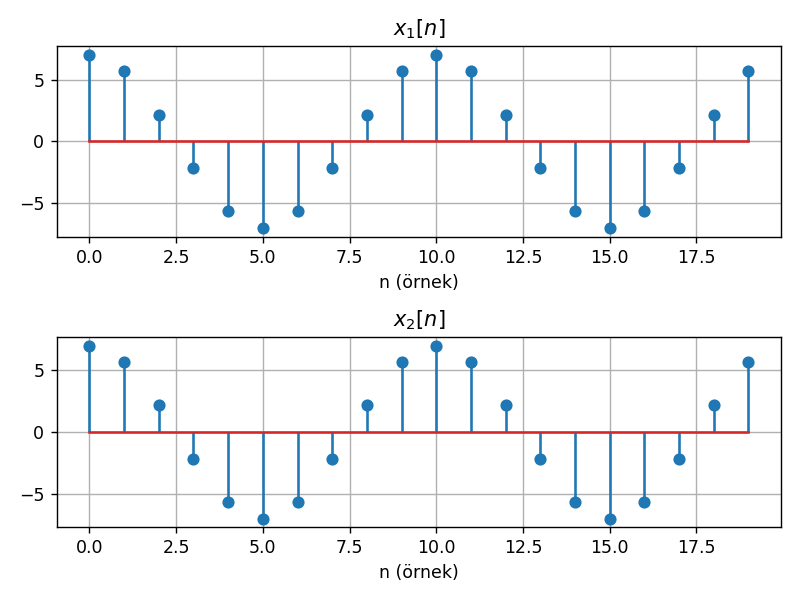

In [5]:
Fs = 1000             # örnekleme frekansı
Ts = 1/Fs             # örnekleme periyodu
N = 10                # örnekleme indisi
n = np.arange(0, 2*N) # iki periyod olacak şekilde örnekleme aralığı


x_12 = 7*cos(200*pi*n*Ts)                       # x_12[n]
x_22 = 3*cos(200*pi*n*Ts) + 4*cos(1800*pi*n*Ts) # x_22[n]

plt.figure() # yeni figür

plt.subplot(2, 1, 1), plt.stem(n, x_12), plt.title('$x_1[n]$'), plt.xlabel('n (örnek)'), plt.grid() # x_12[n] işareti çizdirildi
plt.subplot(2, 1, 2), plt.stem(n, x_22), plt.title('$x_2[n]$'), plt.xlabel('n (örnek)'), plt.grid() # x_22[n] işareti çizdirildi

plt.tight_layout()
plt.show()

Birbirini $2\pi$'ye tamamlayan sinüsoidal işaretler aynı işarete karşılık geldiği için; $x_2[n] = 3cos(\frac{\pi}{5}n)+4cos(\frac{9\pi}{5}n) = 3cos(\frac{\pi}{5}n) + 4 cos((2\pi-\frac{9\pi}{5})n) = 3cos(\frac{\pi}{5}n)+4cos(\frac{\pi}{5}n) = 7cos(\frac{\pi}{5}n) = x_1[n]$ olur. Örneklenen iki işaret birbirine örneklenme frekansı sebebiyle eşit olduğu için, grafikleri de aynı çıkmıştır.

### b)

<IPython.core.display.Javascript object>


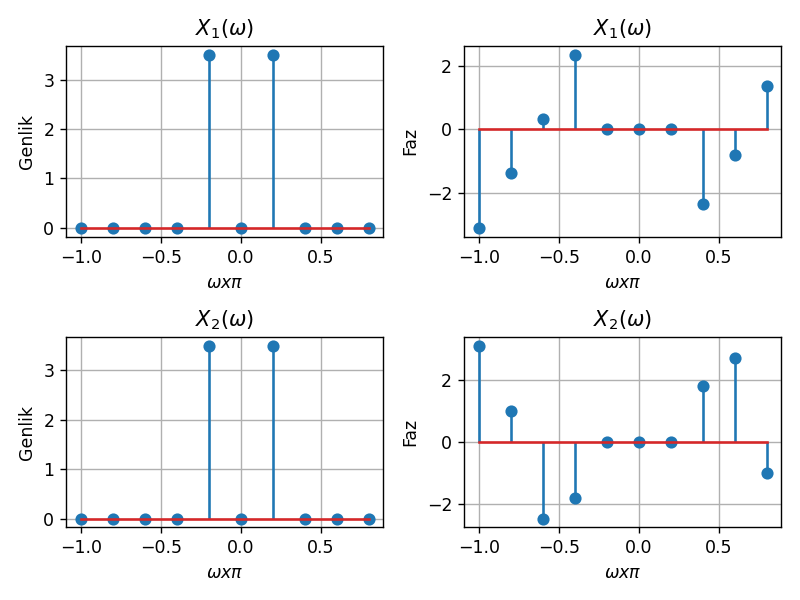

In [6]:
w = np.arange(-np.pi, np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında 2pi/N aralıklarla tanımlandı

x_12_w = np.fft.fftshift(np.fft.fft(x_12, N)/N)   # x_12[n]'in FT alındı

x_22_w = np.fft.fftshift(np.fft.fft(x_22, N)/N)   # x_22[n]'in FT alındı


plt.figure() # yeni figür

plt.subplot(2, 2, 1), plt.stem(w/pi, abs(x_12_w)), plt.grid()                  # x_12(w) işaretinin genlik grafiği çizdirildi
plt.title("$X_1(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Genlik')  # başlık ve eksen isimlendirmesi yapıldı

plt.subplot(2, 2, 2), plt.stem(w/pi, np.angle(x_12_w)), plt.grid()             # x_12(w) işaretinin faz grafiği çizdirildi
plt.title("$X_1(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Faz')     # başlık ve eksen isimlendirmesi yapıldı

plt.subplot(2, 2, 3), plt.stem(w/pi, abs(x_22_w)), plt.grid()                  # x_22(w) işaretinin genlik grafiği çizdirildi
plt.title("$X_2(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Genlik')  # başlık ve eksen isimlendirmesi yapıldı

plt.subplot(2, 2, 4), plt.stem(w/pi, np.angle(x_22_w)), plt.grid()             # x_22(w) işaretinin faz grafiği çizdirildi
plt.title("$X_2(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Faz')     # başlık ve eksen isimlendirmesi yapıldı

plt.tight_layout() 
plt.show()

Genlik grafikleri beklendiği gibi aynıyken faz grafiğinde farklılıklar görülmektedir. Fakat farklı faz değerlerini aldıkları noktalarda genlikler 0 olduğu için işaretin bu fazları, ayrık zamanlı işareti geri elde etmek istediğimizde önemsizdir.

### c)

$X_1(\omega)=X_2(\omega)=3.5e^{j0}\delta(\omega-0.2\pi) + 3.5e^{j0}\delta(\omega+0.2\pi)=3.5\delta(\omega-0.2\pi)+3.5\delta(\omega+0.2\pi) \leftrightarrow x_1[n]=2x3.5cos(0.2\pi n)
\\ 0.2 =\frac{1}{5}
\\ x_1[n]=x_2[n]=7cos(\frac{\pi}{5} n)
$ Geri elde edilen işareter, b şıkkındaki hesaplamadan sonra beklendiği gibi çıktı. Normalde iki işaret birbirinden farklı olsa da örneklendikten sonra birbirlerine eşit olduklarını bulmuştuk. Örneklenen işaretler beklendikleri gibi elde edildi. İşaretlerin temel frekansları 100 Hz olmasına rağmen, ikinci işaretteki 900 Hz frekanslı işaretin (birinci işaretten farklı olan dalgalanmalara sebep olan işaret) Nyquist şartını sağlamaması sebebiyle (900x2 = 1800 > 1000) bu bozulma meydana gelmiştir.

## SORU-3

$x_3(t)=sin(9600\pi t)$

### a)

Temel frekans = $\frac{9600\pi}{2\pi}=4800$ Hz

<IPython.core.display.Javascript object>


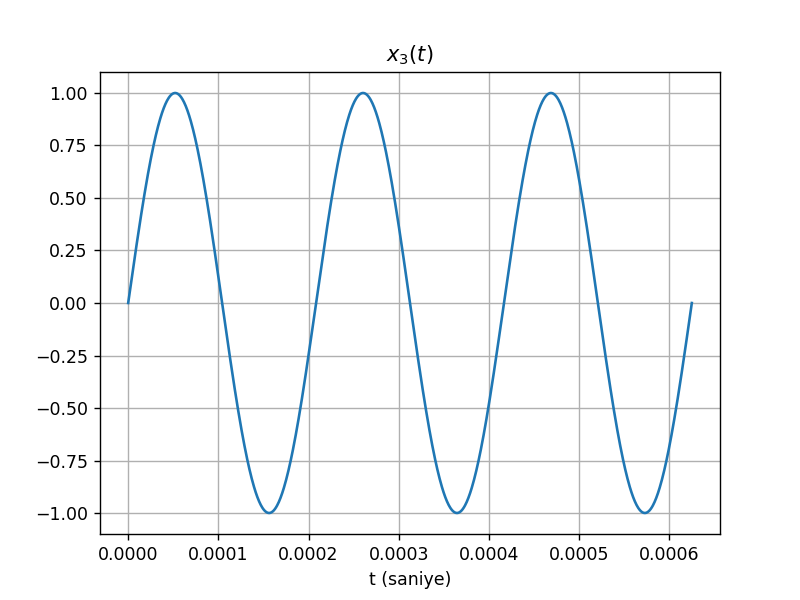

In [7]:
T = 1/4800                     # temel periyot = 1/F
t = np.linspace(0, 3*T, 1000)  # sürekli zaman aralığı ayarlandı
            
x_3 = sin(9600*pi*t)           # x_3(t)

plt.figure() # yeni figür
plt.plot(t, x_3), plt.title('$x_3(t)$'), plt.xlabel('t (saniye)'), plt.grid() # x_3(t) işareti çizdirildi

plt.show()         # grafikler gösterildi

### b)

$x_3[n]=sin(9600\pi\frac{n}{8192})=sin(\frac{75\pi}{64}n) => \omega = \frac{75\pi}{64} = \frac{2\pi k}{N} \rightarrow N=\frac{128}{75}k \rightarrow k=75 => N = 128$.

<IPython.core.display.Javascript object>


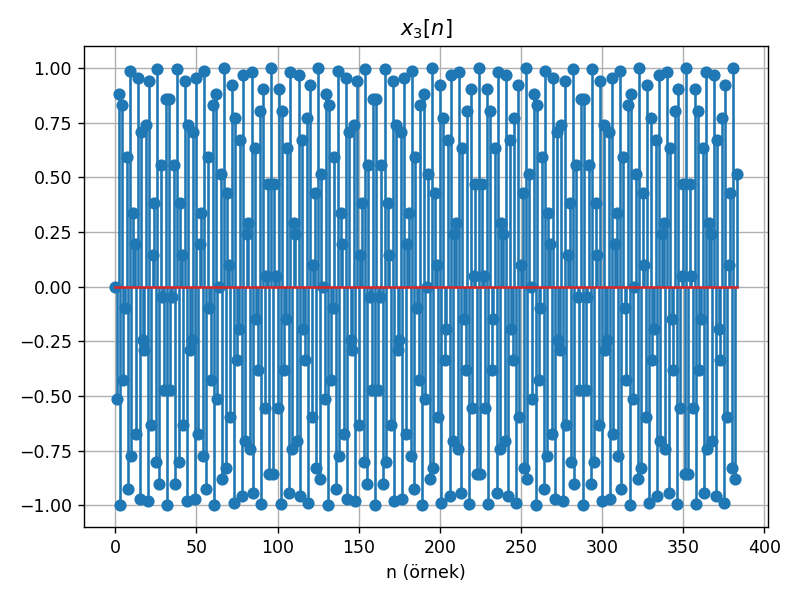

In [8]:
Fs = 8192               # örnekleme frekansı
Ts = 1/Fs               # örnekleme periyodu
N = 128                 # örnekleme indisi
n_3 = np.arange(0, 3*N) # üç periyod olacak şekilde örnekleme aralığı


x_3 = sin(9600*pi*n_3*Ts) # x_3[n]

plt.figure() # yeni figür
plt.stem(n_3, x_3), plt.title('$x_3[n]$'), plt.xlabel('n (örnek)'), plt.grid() # x_3[n] işareti çizdirildi

plt.tight_layout()
plt.show()

### c)

<IPython.core.display.Javascript object>


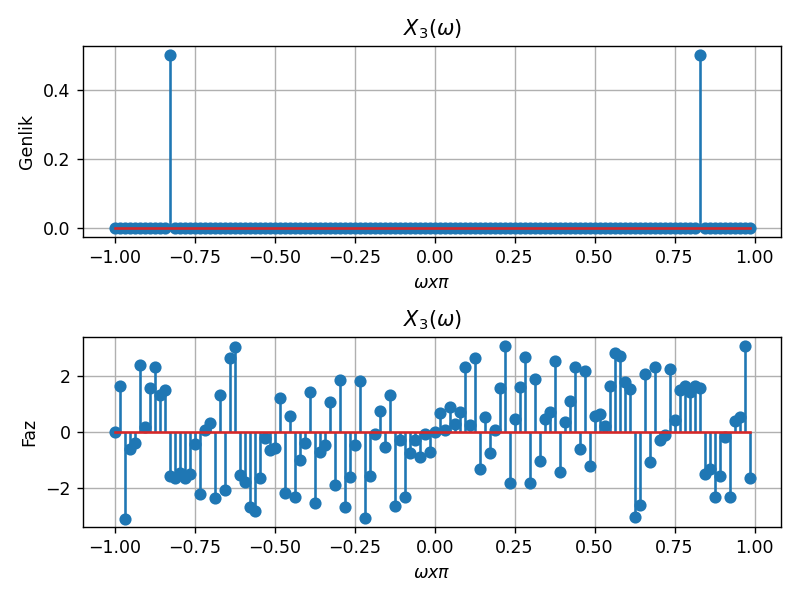

omega değerleri: [-1.00000000e+00 -9.84375000e-01 -9.68750000e-01 -9.53125000e-01
 -9.37500000e-01 -9.21875000e-01 -9.06250000e-01 -8.90625000e-01
 -8.75000000e-01 -8.59375000e-01 -8.43750000e-01 -8.28125000e-01
 -8.12500000e-01 -7.96875000e-01 -7.81250000e-01 -7.65625000e-01
 -7.50000000e-01 -7.34375000e-01 -7.18750000e-01 -7.03125000e-01
 -6.87500000e-01 -6.71875000e-01 -6.56250000e-01 -6.40625000e-01
 -6.25000000e-01 -6.09375000e-01 -5.93750000e-01 -5.78125000e-01
 -5.62500000e-01 -5.46875000e-01 -5.31250000e-01 -5.15625000e-01
 -5.00000000e-01 -4.84375000e-01 -4.68750000e-01 -4.53125000e-01
 -4.37500000e-01 -4.21875000e-01 -4.06250000e-01 -3.90625000e-01
 -3.75000000e-01 -3.59375000e-01 -3.43750000e-01 -3.28125000e-01
 -3.12500000e-01 -2.96875000e-01 -2.81250000e-01 -2.65625000e-01
 -2.50000000e-01 -2.34375000e-01 -2.18750000e-01 -2.03125000e-01
 -1.87500000e-01 -1.71875000e-01 -1.56250000e-01 -1.40625000e-01
 -1.25000000e-01 -1.09375000e-01 -9.37500000e-02 -7.81250000e-02
 -6.2500

In [9]:
w = np.arange(-np.pi, np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında 2pi/N aralıklarla tanımlandı

x_3_w = np.fft.fftshift(np.fft.fft(x_3, N)/N)   # x_3[n]'in FT alındı
plt.figure() # yeni figür

plt.subplot(2, 1, 1), plt.stem(w/pi, abs(x_3_w)), plt.grid()                   # x_3(w) işaretinin genlik grafiği çizdirildi
plt.title("$X_3(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Genlik')  # başlık ve eksen isimlendirmesi yapıldı


plt.subplot(2, 1, 2), plt.stem(w/pi, np.angle(x_3_w)), plt.grid()              # x_3(w) işaretinin faz grafiği çizdirildi
plt.title("$X_3(\omega)$"), plt.xlabel("$\omega x\pi$"), plt.ylabel('Faz')     # başlık ve eksen isimlendirmesi yapıldı

plt.tight_layout() 
plt.show()

print('omega değerleri:',w/pi) # grafikte tam değeri kullanabilmek için yazdırdım.

### d)

$X(\omega)=0.5e^{-j1.5\pi}\delta(\omega-0.8281\pi) + 0.5e^{j1.5\pi}\delta(\omega+0.8281\pi)=0.5j\delta(\omega-0.8281\pi) + 0.5(-j)e^{j1.5\pi}\delta(\omega+0.8281\pi)=\frac{0.5}{-j}\delta(\omega-0.8281\pi) + \frac{0.5}{j}\delta(\omega+0.8281\pi)\leftrightarrow x_4[n]= -2x0.5sin(0.8281\pi n) = -sin(0.8281\pi n)
$

### e)

<IPython.core.display.Javascript object>


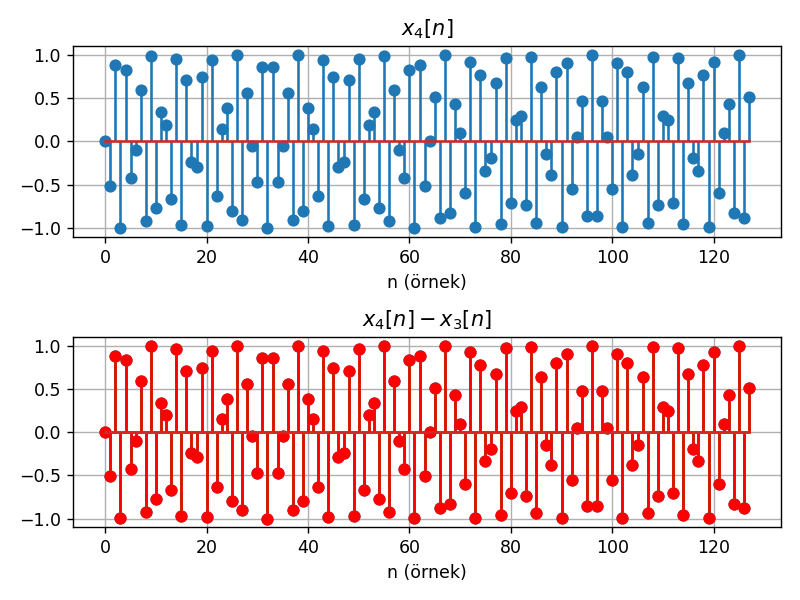

In [10]:
Fs = 8192             # örnekleme frekansı
Ts = 1/Fs             # örnekleme periyodu
N = 128               # örnekleme indisi
n_3 = np.arange(0, N) # 1 periyod olacak şekilde örnekleme aralığı


x_3 = sin(9600*pi*n_3*Ts) # x_3[n]

x_3_2 = -sin(0.828125*pi*n_3) # x_3[n]

plt.figure() # yeni figür

# x_3_2[n] tek görebilmek için çizdirildi
plt.subplot(2, 1, 1), plt.stem(n_3, x_3_2), plt.title('$x_4[n]$'), plt.xlabel('n (örnek)'), plt.grid()
# iki işaret tek grafik üzerinde çizdirildi
plt.subplot(2, 1, 2), plt.stem(n_3, x_3_2, 'g'), plt.stem(n_3, x_3, 'r', markerfmt = 'ro'), plt.title('$x_4[n]-x_3[n]$'), plt.xlabel('n (örnek)'), plt.grid()

plt.tight_layout()
plt.show()

Grafiklerden görüldüğü gibi, işaretler birebir örtüştüğü için, $x_4[n]$ işaretini de net görebilmek için ayrıca çizdirdim. $\omega$ değerini tam almayıp yuvarladığımda kaymalar meydana geldiği için, hesaplama yaparken yuvarlanmış değeri kullanmama rağmen grafiği çizdirirken tam değerini kullanabilmek adına değerleri print ettim.

Grafikten yapılan gözlem sonucu, $x_3[n]=sin(\frac{75\pi}{64}n)=sin((\frac{75\pi}{64}-2\pi)n)=sin(-\frac{53\pi}{64}n)=sin(-0.828125n)=x_4[n]$ birbirlerini $2\pi$'ye tamamlayan sinüsoidal işaret oldukları için aynı işarete karşılık geldikleri görüldü.

## SORU-4

In [11]:
# kuantalama fonksiyonu

def quantize(x, S):
    X = x.reshape((-1, 1))
    S = S.reshape((1, -1))
    dists = abs(X-S)
    
    nearestIndex = dists.argmin(axis=1)
    quantized = S.flat[nearestIndex]
    
    return quantized.reshape(x.shape)

<IPython.core.display.Javascript object>


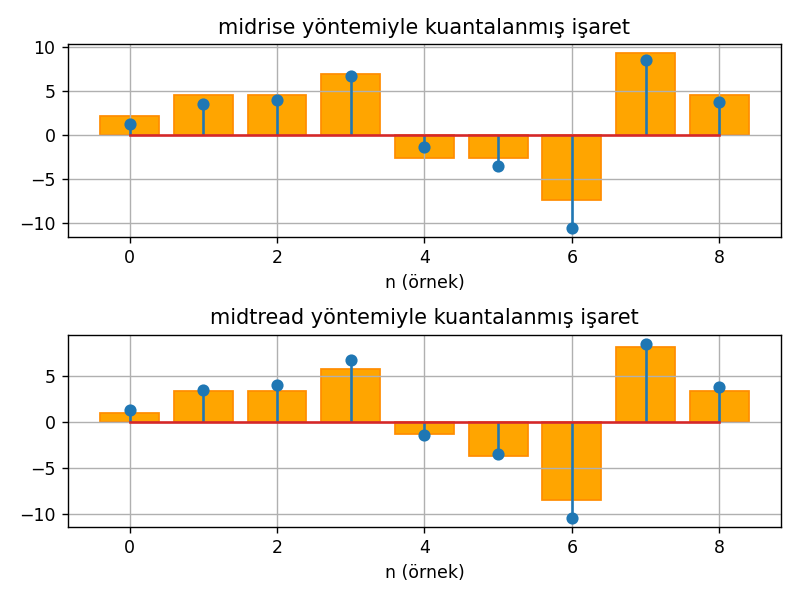

In [12]:
x_4 = np.array([1.25, 3.5, 4, 6.7, -1.4, -3.5, -10.5, 8.5, 3.8]) # verilen x[n] işareti

n=np.arange(0., 9) # örnekleme indisinin 0'dan k periyot olacak şekilde array olarak tanımlanması

k_bit = 3  # 3 bit ile ifade edilecek
max_range = np.amax(x_4)-np.amin(x_4) # y eksenindeki max değer aralığı
q = pow(2, k_bit)
delta = max_range/q

S_midrise = -np.amax(x_4) + delta/2 + np.arange(q)*delta
S_midtread = -np.amax(x_4) + np.arange(q)*delta

y_midrise = quantize(x_4, S_midrise)
y_midtread = quantize(x_4, S_midtread)

plt.figure() #yeni bir figure penceresi açar

plt.subplot(2, 1, 1), plt.stem(n, x_4), plt.grid()              # x[n] işaretinin grafiğinin çizdirildi
plt.bar(n, y_midrise, color='orange', edgecolor = "darkorange") # kuantalanmış işaretin grafiğinin çizdirildi
plt.xlabel('n (örnek)'), plt.title('midrise yöntemiyle kuantalanmış işaret') 

plt.subplot(2, 1, 2), plt.stem(n, x_4), plt.grid()               # x[n] işaretinin grafiğinin çizdirildi
plt.bar(n, y_midtread, color='orange', edgecolor = "darkorange") # kuantalanmış işaretin grafiğinin çizdirildi
plt.xlabel('n (örnek)'), plt.title('midtread yöntemiyle kuantalanmış işaret') 

plt.tight_layout() 
plt.show() # grafiklerin gösterilmesi